<a href="https://colab.research.google.com/github/AnshulSaini17/Image_classification/blob/main/MNIST_fashion_ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
train_df = pd.read_csv('/content/drive/MyDrive/Data/fashion-mnist_train.csv',sep=',')
test_df = pd.read_csv('/content/drive/MyDrive/Data/fashion-mnist_test.csv',sep=',')


In [6]:
train_data = np.array(train_df, dtype = 'float32')
test_data = np.array(test_df, dtype='float32')

In [8]:
x_train = train_data[:,1:]/255

y_train = train_data[:,0]

x_test= test_data[:,1:]/255

y_test=test_data[:,0]

In [11]:
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt

x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

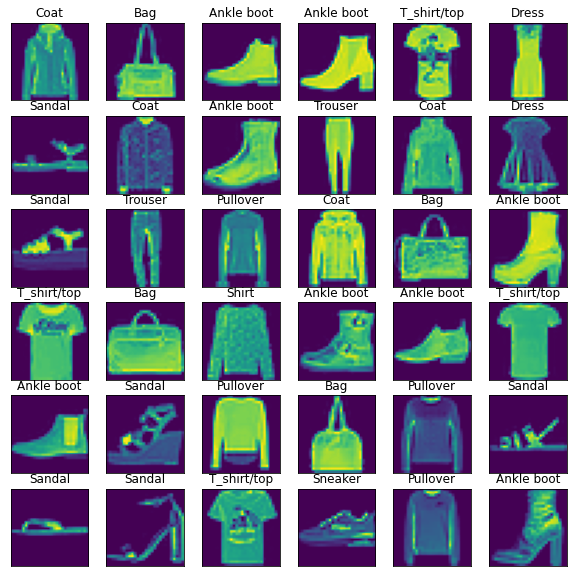

In [12]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [13]:
# W_grid = 15
# L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid, figsize = (16,16))
# axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
# n_train = len(train_data) # get the length of the train dataset

# # Select a random number from 0 to n_train
# for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

#     # Select a random number
#     index = np.random.randint(0, n_train)
#     # read and display an image with the selected index    
#     axes[i].imshow( train_data[index,1:].reshape((28,28)) )
#     labelindex = int(train_data[index,0])
#     axes[i].set_title(class_names[labelindex], fontsize = 9)
#     axes[i].axis('off')

# plt.subplots_adjust(hspace=0.3)

In [14]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1) 

In [15]:
x_train.shape

(38400, 784)

In [16]:
x_train = x_train.reshape(x_train.shape[0],*image_shape) 
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

In [17]:
import random
import matplotlib.pyplot as plt

In [18]:
# idx = random.randint(0,len(x_train))
# plt.imshow(x_train[idx,:])
# plt.show()

# MODEL

In [19]:
model = Sequential([
                    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
                    MaxPooling2D((2,2)),

                    Conv2D(32,(3,3),activation='relu'),
                    MaxPooling2D((2,2)),

                    Flatten(),
                    Dense(64,activation='relu'),
                    Dense(10,activation='softmax'),

                    
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 64)                5

In [21]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [22]:
history = model.fit(x_train,y_train,epochs=5,batch_size=10,validation_data=(x_validate,y_validate))

Epoch 1/5
3840/3840 [==============================] - 26s 5ms/step - loss: 0.4957 - accuracy: 0.8189 - val_loss: 0.3514 - val_accuracy: 0.8743
Epoch 2/5
3840/3840 [==============================] - 17s 4ms/step - loss: 0.3416 - accuracy: 0.8766 - val_loss: 0.3354 - val_accuracy: 0.8795
Epoch 3/5
3840/3840 [==============================] - 17s 5ms/step - loss: 0.2924 - accuracy: 0.8927 - val_loss: 0.3122 - val_accuracy: 0.8886
Epoch 4/5
3840/3840 [==============================] - 17s 4ms/step - loss: 0.2586 - accuracy: 0.9045 - val_loss: 0.2889 - val_accuracy: 0.8997
Epoch 5/5
3840/3840 [==============================] - 17s 4ms/step - loss: 0.2324 - accuracy: 0.9134 - val_loss: 0.2786 - val_accuracy: 0.8996


In [23]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2628 - accuracy: 0.9059


[0.2627978026866913, 0.9059000015258789]

# Graphs for loss and accuracy

Text(0.5, 1.0, 'Train - Accuracy')

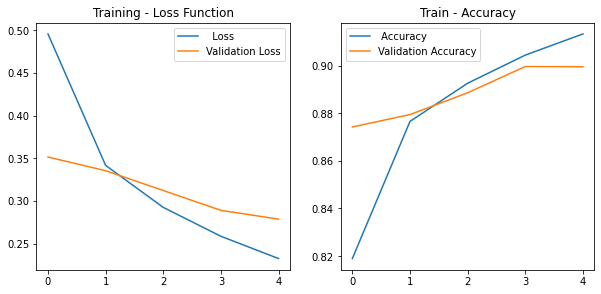

In [24]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='  Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label=' Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

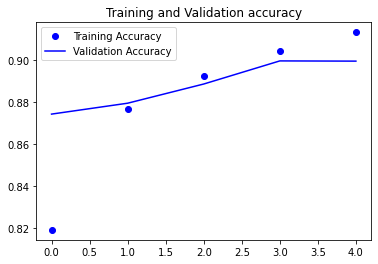

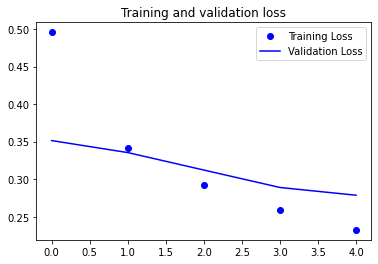

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# **Making Predictions**

In [ ]:
# idx2 = random.randint(0,len(test_labels))
# plt.imshow(x_test[idx2,:])
# plt.show()

# y_pred = model.predict(x_test[idx2,:].reshape(1,28,28,1))
# print(y_pred)